<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
اکتشاف
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    توضیحات اولیه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>    برای آشنایی بیشتر با دادگان این پروژه، در این مرحله اقدام به انجام عملیات اکتشاف می‌کنیم. با استفاده از دادگان پردازش‌شده در گام قبل (<code>preprocessed_sales.csv</code>)، جواب هر کدام از سوال‌های زیر را در متغیر توضیح داده شده آن سوال، قرار دهید.
</font>
</p>

   
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    کتابخانه‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
       ابتدا کتاب‌خانه‌های مورد نیاز خود را اضافه کنید.    
</font>
</p>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    فایل پیش‌پردازش‌شده را بخوانید.
</font>
</p>

In [2]:
# read the preprocessed dataset
df = pd.read_csv("../1_preprocessing/preprocessed_sales.csv")

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    قسمت اول
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    تعداد فاکتورهای باقی‌مانده چند عدد است؟ جواب خود را در متغیر <code>number_of_orders</code> قرار دهید
        
</font>
</p>

In [3]:
df

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom


In [33]:
# calculate the number of remaining orders

number_of_orders = len(df["InvoiceNumber"].unique())


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    قسمت دوم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در چه بازه زمانی، این دادگان جمع شده‌اند؟ جواب خود را به صورت یک tuple (به ترتیب کوچک‌ترین و بزرگترین زمان) در متغیر <code>window_period</code> قرار دهید.
    <br>
    به عنوان مثال، اگر فرضا کوچک‌ترین زمان، 18:20:00 05-04-2008 و بزرگ‌ترین زمان 20:40:00 19-11-2010 باشد، متغیر <code>window_period</code> به صورت زیر مقدار‌دهی می‌شود 
</font>
</p>

```python
window_period = ('2008-04-05 18:20:00', '2010-11-19 20:40:00')
```

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
توجه کنید که مثال بالا کاملا تصادفی است و ممکن است جوابی که شما به دست می‌آورید، با آن متفاوت باشد.
</font>
</p>

In [5]:
# calculate the period window

window_period = (df["InvoiceDate"].min(), df["InvoiceDate"].max())

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    قسمت سوم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از نمودار میله‌ای، نشان دهید که در هر روز هفته، چند فاکتور صادر شده است.
<br>
برای انجام این کار، ابتدا باید روزی از هفته که معامله در آن انجام شده است را پیدا کنید، سپس محاسبه کنید که در هر روز هفته، چند فاکتور یکتا صادر شده است.
<br>
نمودار شما به شکل زیر خواهد شد:
</font>
</p>

<p style="text-align:center;"><img src="output.png"></p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ویژگی‌های نمودار
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<table dir=rtl align = center>

<tr>
<th><font face="vazir" size=3>ویژگی</th>
<th><font face="vazir" size=3>مقدار</th>
</tr>

<tr>
<td><font face="vazir" size=3>اندازه شکل</td>
<td><font face="vazir" size=3>۱۵ در ۶ اینچ</td>
</tr>

<tr>
<td><font face="vazir" size=3>رنگ میله‌ها</td>
<td><font face="vazir" size=3>lime</td>
</tr>

<tr>
<td><font face="vazir" size=3>رنگ عنوان محور افقی و عمودی</td>
<td><font face="vazir" size=3>lightseagreen</td>
</tr>

<tr>
<td><font face="vazir" size=3>رنگ عنوان صفحه محور</td>
<td><font face="vazir" size=3>green</td>
</tr>

<tr>
<td><font face="vazir" size=3>اندازه فونت عنوان صفحه محور، عنوان محورهای افقی و عمودی و اسم روزهای هفته  </td>
<td><font face="vazir" size=3>۱۵</td>
</tr>

<tr>
<td><font face="vazir" size=3>زاویه اسم روزها هفته </td>
<td><font face="vazir" size=3>۰</td>
</tr>

</table>
</p>



In [173]:
day_df = pd.Series()
day_df = df.drop_duplicates(subset=["InvoiceNumber"])
day_df["datetime"] = pd.to_datetime(df["InvoiceDate"])

day_df["day_num"] = day_df["datetime"].dt.day_name()

C:\Users\asus\AppData\Local\Temp\ipykernel_16948\4119069293.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  day_df = pd.Series()
C:\Users\asus\AppData\Local\Temp\ipykernel_16948\4119069293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df["datetime"] = pd.to_datetime(df["InvoiceDate"])
C:\Users\asus\AppData\Local\Temp\ipykernel_16948\4119069293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [174]:
day_df
value = day_df["day_num"].value_counts()

Text(0.5, 1.0, 'Number of orders for different Days')

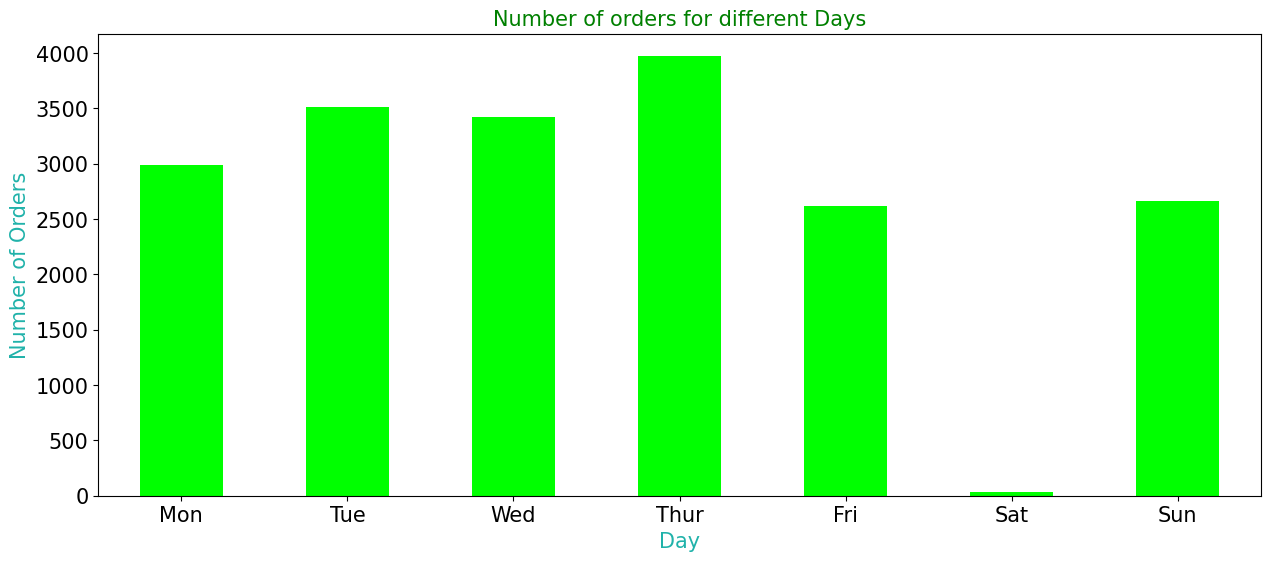

In [177]:
# plot the number of orders per week day

fig1 , ax1 = plt.subplots(figsize=(15, 6))

dct = {"y" : [value.Monday, value.Tuesday, value.Wednesday, value.Thursday, value.Friday, value.Saturday, value.Sunday]}
x = ["Mon","Tue","Wed","Thur","Fri","Sat","Sun"]
dct_pd = pd.DataFrame(dct, index=x)

dct_pd.plot(kind="bar", figsize=(15,6), ax=ax1, color="lime", fontsize=15, legend=False)
plt.xticks(rotation = 0)
ax1.set_xlabel("Day", color="lightseagreen", fontsize=15)
ax1.set_ylabel("Number of Orders", color="lightseagreen", fontsize=15)
ax1.set_title("Number of orders for different Days", color="green", fontsize=15)

In [221]:
price_df = df.copy()
price_df["WholePrice"] = price_df["UnitPrice"] * price_df["Quantity"]

In [242]:
price_df

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country,WholePrice,month_year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009-12
...,...,...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,5.90,2010-12
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,2010-12
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,2010-12
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,7.50,2010-12


In [305]:
price_df["InvoiceDate"] = pd.to_datetime(price_df["InvoiceDate"])

price_df['month_year'] = price_df['InvoiceDate'].dt.to_period('M')
price_df["month_year"] = price_df["month_year"].astype(str)
month_df = price_df.groupby("month_year")["WholePrice"].sum()
month_df = month_df.reset_index()

In [314]:
month_df["month_year"] = ["Dec_2009", "Jan_2010", "Feb_2010", "Mar_2010", "Apr_2010", "May_2010", "Jun_2010", "July_2010", "Aug_2010", "Sep_2010", "Oct_2010", "Nov_2010", "Dec_2010"]

In [315]:
month_df = month_df.set_index("month_year")

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    قسمت چهارم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
این بار از شما خواسته‌اند تا مجموع فروش در هر ماه را در یک نمودار میله‌ای تحویلشان دهید.
<br>
<br>
برای رسم این نمودار، باید مجموع هزینه دریافتی برای هر فاکتور را محاسبه کنید. سپس با استفاده از مجموع هزینه دریافتی و زمان انجام معاملات، نمودار زیر را رسم کنید.
</font>
</p>

<p style="text-align:center;"><img src="output2.png"></p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ویژگی‌های نمودار
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<table dir=rtl align = center>

<tr>
<th><font face="vazir" size=3>ویژگی</th>
<th><font face="vazir" size=3>مقدار</th>
</tr>

<tr>
<td><font face="vazir" size=3>اندازه شکل</td>
<td><font face="vazir" size=3>۱۵ در ۶ اینچ</td>
</tr>

<tr>
<td><font face="vazir" size=3>رنگ میله‌ها</td>
<td><font face="vazir" size=3>darkkhaki</td>
</tr>

<tr>
<td><font face="vazir" size=3>رنگ عنوان محور افقی و عمودی</td>
<td><font face="vazir" size=3>orange</td>
</tr>

<tr>
<td><font face="vazir" size=3>رنگ عنوان صفحه محور</td>
<td><font face="vazir" size=3>cadetblue</td>
</tr>

<tr>
<td><font face="vazir" size=3>اندازه فونت عنوان صفحه محور، عنوان محورهای افقی و عمودی  </td>
<td><font face="vazir" size=3>۱۵</td>
</tr>

<tr>
<td><font face="vazir" size=3>اندازه فونت اسم ماه‌ها  </td>
<td><font face="vazir" size=3>۱۳</td>
</tr>

<tr>
<td><font face="vazir" size=3>زاویه اسم ماه‌ها </td>
<td><font face="vazir" size=3>۴۵</td>
</tr>

</table>
</p>


Text(0, 0.5, 'Sales amount')

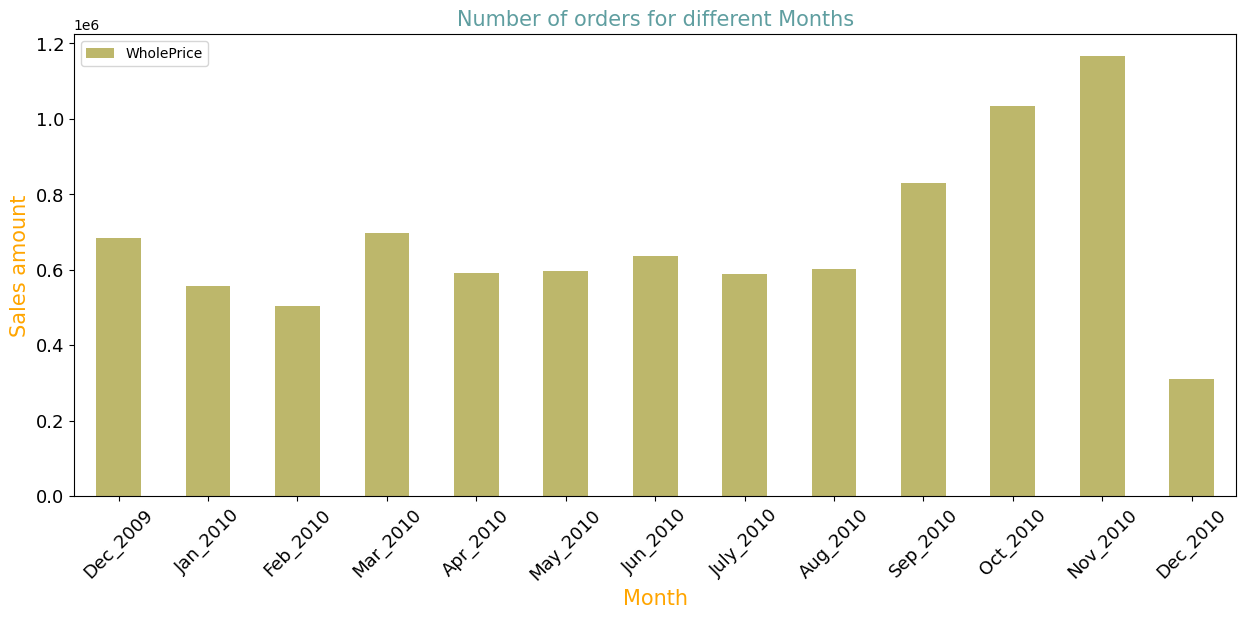

In [316]:

fig2 , ax2 = plt.subplots(figsize=(15,6))
month_df.plot(kind="bar", color="darkkhaki", ax=ax2, fontsize=13)
plt.xticks(rotation=45);
ax2.set_title("Number of orders for different Months", color="cadetblue", fontsize=15)
ax2.set_xlabel("Month", color="orange", fontsize=15)
ax2.set_ylabel("Sales amount", color="orange", fontsize=15)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سلول جواب‌ساز    
</font>
</h2>


In [317]:
# export your results

import zipfile
import joblib

joblib.dump(number_of_orders,"number_of_orders")
joblib.dump(window_period,"window_period")
joblib.dump(fig1,"fig1")
joblib.dump(fig2,"fig2")


def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["number_of_orders", "window_period", "fig1", "fig2", "2_exploration.ipynb"]
compress(file_names)

File Paths:
['number_of_orders', 'window_period', 'fig1', 'fig2', '2_exploration.ipynb']
